In [1]:
# read in the necessary packages
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in the dataset
dataset = pd.read_excel('dataset2.xlsx',converters={'Medical result（0 No；1 mild；2 severe）':int})

# fill in the missing value with 0
col_set = dataset.columns
for column in col_set :
    dataset[column].fillna(0, inplace = True)

# split the target variable and trainning features
X = dataset.iloc[:,:-1]
y = dataset['Medical result（0 No；1 mild；2 severe）']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [4]:
# Decision Tree Classifier
model_tree = OneVsRestClassifier(tree.DecisionTreeClassifier()).fit(X_train,Y_train)
y_predict_tree = model_tree.predict(X_test)

# Logistics Regression Classifier
model_logistic = OneVsRestClassifier(LogisticRegression(penalty='l2')).fit(X_train,Y_train)
y_predict_logistic = model_logistic.predict(X_test)

# Gradient Boosting Decision Tree Classifier
model_GBDT = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=300)).fit(X_train,Y_train)
y_predict_GBDT = model_GBDT.predict(X_test)

# Support Vector CLassifier
model_SVC = OneVsRestClassifier(LinearSVC(random_state = 0)).fit(X_train,Y_train)
y_predict_SVC = model_SVC.predict(X_test)


In [5]:
from sklearn.neighbors import KNeighborsClassifier

model_knn =OneVsRestClassifier(KNeighborsClassifier())
y_predict_knn = model_knn.fit(X_train,Y_train).predict(X_test)

np.mean(y_predict_knn==Y_test)

0.6105263157894737

In [6]:

precision_recall_fscore_support(Y_test, y_predict_GBDT, average=None)

(array([0.86363636, 0.94642857, 1.        ]),
 array([0.95      , 0.94642857, 0.89473684]),
 array([0.9047619 , 0.94642857, 0.94444444]),
 array([20, 56, 19], dtype=int64))

In [7]:

precision_recall_fscore_support(Y_test, y_predict_SVC, average=None)

(array([0.875     , 0.63855422, 0.5       ]),
 array([0.35      , 0.94642857, 0.10526316]),
 array([0.5       , 0.76258993, 0.17391304]),
 array([20, 56, 19], dtype=int64))

In [8]:

precision_recall_fscore_support(Y_test, y_predict_tree, average=None)

(array([0.88235294, 0.90740741, 0.75      ]),
 array([0.75      , 0.875     , 0.94736842]),
 array([0.81081081, 0.89090909, 0.8372093 ]),
 array([20, 56, 19], dtype=int64))

In [9]:

precision_recall_fscore_support(Y_test, y_predict_logistic, average=None)

(array([0.6875    , 0.70422535, 0.625     ]),
 array([0.55      , 0.89285714, 0.26315789]),
 array([0.61111111, 0.78740157, 0.37037037]),
 array([20, 56, 19], dtype=int64))

In [10]:

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
precision_recall_fscore_support(Y_test, y_predict_knn, average=None)

(array([0.55555556, 0.64864865, 0.41666667]),
 array([0.25      , 0.85714286, 0.26315789]),
 array([0.34482759, 0.73846154, 0.32258065]),
 array([20, 56, 19], dtype=int64))

In [11]:
# prediction accuracy -
acc = {'Decision Tree': np.mean(y_predict_tree == Y_test),'Logistics': np.mean(y_predict_logistic == Y_test), 'GBDT': np.mean(y_predict_GBDT == Y_test), 'SVC': np.mean(y_predict_SVC == Y_test)}

In [12]:
acc

{'Decision Tree': 0.8631578947368421,
 'Logistics': 0.6947368421052632,
 'GBDT': 0.9368421052631579,
 'SVC': 0.6526315789473685}

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# evaluate the model with K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_GBDT, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 88.42% (3.94%)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# evaluate the model with K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_tree, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 78.95% (8.81%)


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# evaluate the model with K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_SVC, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 51.58% (21.68%)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# evaluate the model with K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_logistic, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 65.26% (6.32%)


## Confusion Matrix

In [17]:
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm_tree = confusion_matrix(Y_test, y_predict_tree, labels=[0,1,2])
cm_logistic = confusion_matrix(Y_test, y_predict_logistic, labels=[0,1,2])
cm_GBDT = confusion_matrix(Y_test, y_predict_GBDT, labels=[0,1,2])
cm_SVC = confusion_matrix(Y_test, y_predict_SVC, labels=[0,1,2])

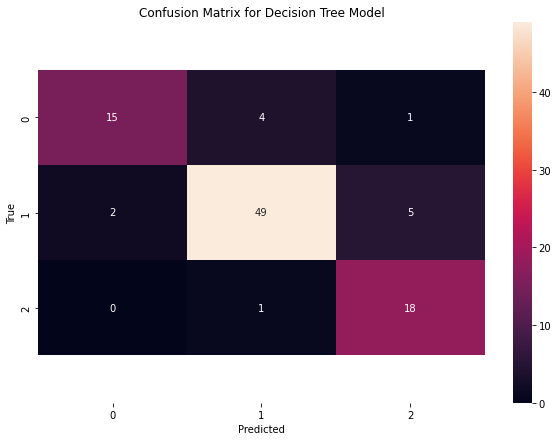

In [18]:
# decision tree
df_cm = pd.DataFrame(cm_tree, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for Decision Tree Model')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_tree_150', dpi = 150)
plt.savefig('confusion_matrix_tree_600', dpi = 600)
plt.show()

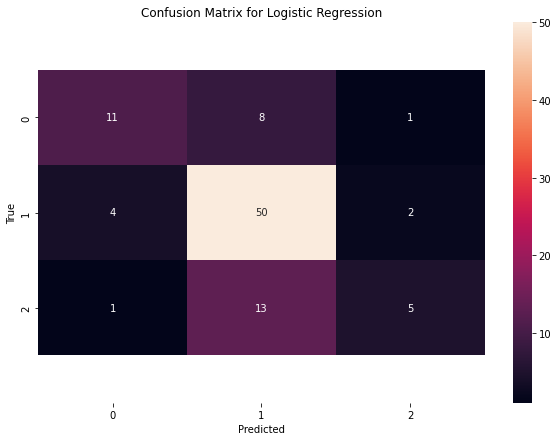

In [19]:
# logistic regression
df_cm = pd.DataFrame(cm_logistic, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_logistic_150', dpi = 150)
plt.savefig('confusion_matrix_logistic_600', dpi = 600)
plt.show()

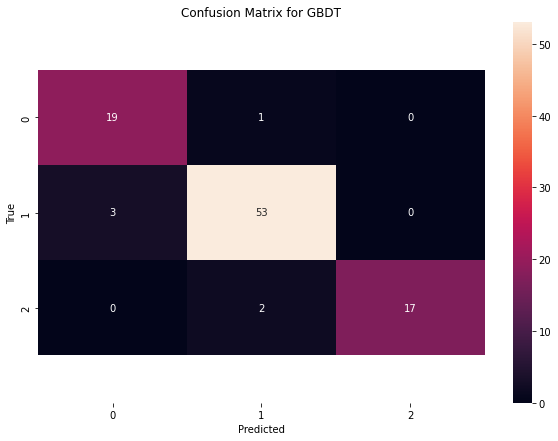

In [20]:
# GBDT
df_cm = pd.DataFrame(cm_GBDT, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for GBDT')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_GBDT_150', dpi = 150)
plt.savefig('confusion_matrix_GBDT_600', dpi = 600)
plt.show()

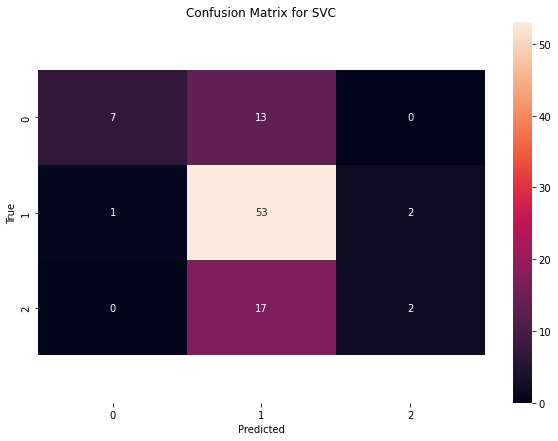

In [21]:
# SVC
df_cm = pd.DataFrame(cm_SVC, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for SVC')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_SVC_150', dpi = 150)
plt.savefig('confusion_matrix_SVC_600', dpi = 600)
plt.show()

## Feature Importance

In [22]:
importances = model_tree.estimators_[1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model_tree.estimators_],
             axis=0)
importance_map = {'importance': importances, 'standard deviation': std}
importance_df = pd.DataFrame(importance_map, columns = ['importance', 'standard deviation'], index = X.columns)
importance_df = importance_df.sort_values('importance', ascending= False)

In [23]:
importance_df.head()

,importance,standard deviation
Three Concave Sign（<=1/3 is mild；1：multiple lobar involvement are severe）：1 mild；2 severe,0.560946,0.116145
Cough Nature：0 without cough；1dry cough；2 phlegmy cough,0.078311,0.049331
Pleural Effusion：0 NO；1YES,0.048932,0.036299
Rhonchus or Wheeze：0 NO；1Left；2 right；3 two sides,0.043125,0.023302
Moist Crackles：0 NO；1 Left；2 Right；3 Two sides,0.041961,0.024728


In [24]:
importances = model_GBDT.estimators_[1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model_GBDT.estimators_],
             axis=0)
importance_map = {'importance': importances, 'standard deviation': std}
importance_df = pd.DataFrame(importance_map, columns = ['importance', 'standard deviation'], index = X.columns)
importance_df = importance_df.sort_values('importance', ascending= False)

In [25]:
importance_df.head()

,importance,standard deviation
Three Concave Sign（<=1/3 is mild；1：multiple lobar involvement are severe）：1 mild；2 severe,0.590596,0.096790
Cough Nature：0 without cough；1dry cough；2 phlegmy cough,0.095959,0.053138
Pleural Effusion：0 NO；1YES,0.049674,0.036571
Rhonchus or Wheeze：0 NO；1Left；2 right；3 two sides,0.045500,0.025106
Moist Crackles：0 NO；1 Left；2 Right；3 Two sides,0.038632,0.027006
